<a href="https://colab.research.google.com/github/GGpark1/Deep_Learning_Study/blob/master/NLP(Count_base).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#토큰화를 위한 모듈 import

import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [3]:
#str을 토큰화하기

sent1 = "I am a student."
sent2 = "J is the alphabet that follows i."
sent3 = "Is she a student trying to become a data scientist?"

sent_1st = [sent1, sent2, sent3]

total_tokens = []

for i, sent in enumerate(tokenizer.pipe(sent_1st)):
    sent_token = [token.text for token in sent]
    total_tokens.extend(sent_token)
    print(f"sent {i} : {sent_token}")

sent 0 : ['I', 'am', 'a', 'student.']
sent 1 : ['J', 'is', 'the', 'alphabet', 'that', 'follows', 'i.']
sent 2 : ['Is', 'she', 'a', 'student', 'trying', 'to', 'become', 'a', 'data', 'scientist?']


In [4]:
#중복값 지우기

token_set = set(total_tokens)

In [5]:
#DTM 만들기

def word2idx(sent, total):
    sent_token = sent.split()
    return [1 if word in sent_token else 0 for word in total]

sent1_idx = word2idx(sent1, token_set)
sent2_idx = word2idx(sent2, token_set)
sent3_idx = word2idx(sent2, token_set)

In [6]:
#DataFrame 

import pandas as pd

dtm = pd.DataFrame([sent1_idx, sent2_idx, sent3_idx], columns = set(total_tokens), index = ['sent1', 'sent2', 'sent3'])
dtm

,become,trying,she,scientist?,I,to,alphabet,that,data,student,Is,the,student.,J,follows,a,is,am,i.
sent1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
sent2,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,1
sent3,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,1


In [7]:
#정규표현식으로 특수문자 지우기
#소문자로 통일하기

import re

def lower_and_regex(sentence):
    sentence = sentence.lower()
    sentence = re.sub(r"[^a-z ]", "", sentence)
    return sentence

prep_sent_1st = [lower_and_regex(sent) for sent in sent_1st]
print(prep_sent_1st)
total_tokens_prep = []

for i, prep_sent in enumerate(tokenizer.pipe(prep_sent_1st)):
    sent_token_prep = [token.text for token in prep_sent]
    total_tokens_prep.extend(sent_token_prep)
    print(f"sent {i} : {sent_token_prep}")

token_set_prep = set(total_tokens_prep)

['i am a student', 'j is the alphabet that follows i', 'is she a student trying to become a data scientist']
sent 0 : ['i', 'am', 'a', 'student']
sent 1 : ['j', 'is', 'the', 'alphabet', 'that', 'follows', 'i']
sent 2 : ['is', 'she', 'a', 'student', 'trying', 'to', 'become', 'a', 'data', 'scientist']


In [8]:
sent1_idx_prep = word2idx(lower_and_regex(sent1), token_set_prep)
sent2_idx_prep = word2idx(lower_and_regex(sent2), token_set_prep)
sent3_idx_prep = word2idx(lower_and_regex(sent3), token_set_prep)

sent3_idx_prep

[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1]

In [9]:
dtm_re = pd.DataFrame([sent1_idx_prep, sent2_idx_prep, sent3_idx_prep], columns = token_set_prep, index = ['sent1', 'sent2', 'sent3'])
dtm_re

,data,student,to,become,alphabet,the,trying,she,a,is,j,that,i,am,follows,scientist
sent1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0
sent2,0,0,0,0,1,1,0,0,0,1,1,1,1,0,1,0
sent3,1,1,1,1,0,0,1,1,1,1,0,0,0,0,0,1


In [10]:
#DataFrame 단위의 데이터 처리하기

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/amazon/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19_sample.csv')

In [11]:
df.head()

,Unnamed: 0,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,25971,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,53-004485,2017-01-18T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z",NaN,True,NaN,0.0,3,http://reviews.bestbuy.com/3545/5620410/review...,Though I have got it for cheap price during bl...,An average Fire tablet,Ganamurthy,http://reviews.bestbuy.com/3545/5620410/review...
1,19398,AVwjfXqqQMlgsOJE8qmm,2017-05-20T01:34:04Z,2019-02-25T02:23:15Z,"All-New Fire HD 8 Kids Edition Tablet, 8 HD Di...",B01J94SCAM,Amazon,"Fire Tablets,Tablets,Amazon Tablets,Computers ...",Electronics,https://www.barcodable.com/images/barcode/0841...,amazonfirehd8kidsedition8tablet32gb7thgenerati...,Amazon,53-005705,2017-06-22T00:00:00.000Z,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",NaN,True,NaN,17.0,5,http://reviews.bestbuy.com/3545/5836204/review...,"I purchased the 7"" for my son when he was 1.5 ...",3 year old loves it,dcc1970,https://reviews.bestbuy.com/3545/5836204/revie...
2,2410,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2015-04-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Great price and great batteries! I will keep o...,Five Stars,ByDena,"https://www.barcodable.com/upc/841710106442,ht..."
3,25259,AVqVGWLKnnc1JgDc3jF1,2017-03-03T16:55:53Z,2019-02-25T02:03:34Z,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y23MNM,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,firekidseditiontablet7displaywifi16gbgreenkidp...,Amazon,53-004683,2016-10-03T00:00:00.000Z,"2017-06-04T00:00:00Z,2017-06-03T00:00:00Z",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5026300/review...,Great tablet for kids my boys love their table...,Great Tablet for Kids,aboye004,http://reviews.bestbuy.com/3545/5026300/review...
4,7469,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-24T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,2,https://www.amazon.com/product-reviews/B00QWO9...,They lasted really little.. (some of them) I u...,They lasted really little.. (some of them) I ...,ByOctavio Chavez,"https://www.barcodable.com/upc/841710106442,ht..."


In [12]:
df['brand'].value_counts()

Amazon          5977
Amazonbasics    4499
AmazonBasics       7
Name: brand, dtype: int64

In [13]:
df['brand'] = df['brand'].apply(lambda x: x.lower())
df['brand'].value_counts()

amazon          5977
amazonbasics    4506
Name: brand, dtype: int64

In [14]:
import pdb;

In [19]:
import re

regex = r"[^a-zA-Z0-9 ]"
subst = ""

In [17]:
#정규표현식으로 데이터 전처리하기

def tokenize(text):
    #pdb.set_trace()
    tokens = re.sub(regex, subst, text)
    tokens = tokens.lower().split()

    return tokens

df['tokens'] = df['reviews.text'].apply(tokenize)
df['tokens'].head()

0    [though, i, have, got, it, for, cheap, price, ...
1    [i, purchased, the, 7, for, my, son, when, he,...
2    [great, price, and, great, batteries, i, will,...
3    [great, tablet, for, kids, my, boys, love, the...
4    [they, lasted, really, little, some, of, them,...
Name: tokens, dtype: object

In [18]:
#정규표현식의 데이터 전처리 결과

df[['reviews.text', 'tokens']].head(10)

,reviews.text,tokens
0,Though I have got it for cheap price during bl...,"[though, i, have, got, it, for, cheap, price, ..."
1,"I purchased the 7"" for my son when he was 1.5 ...","[i, purchased, the, 7, for, my, son, when, he,..."
2,Great price and great batteries! I will keep o...,"[great, price, and, great, batteries, i, will,..."
3,Great tablet for kids my boys love their table...,"[great, tablet, for, kids, my, boys, love, the..."
4,They lasted really little.. (some of them) I u...,"[they, lasted, really, little, some, of, them,..."
5,"I purchased 2 others for my 5 & 6yr-olds, and ...","[i, purchased, 2, others, for, my, 5, 6yrolds,..."
6,We purchased Amazon Fire kids edition tablet t...,"[we, purchased, amazon, fire, kids, edition, t..."
7,Got this when they were on sale last year and ...,"[got, this, when, they, were, on, sale, last, ..."
8,Lotta batteries. at a good price.,"[lotta, batteries, at, a, good, price]"
9,Best deal and work as expected,"[best, deal, and, work, as, expected]"


In [22]:
#전처리 결과 분석
#Counter 메소드 사용

from collections import Counter

word_counts = Counter()
df['tokens'].apply(lambda x: word_counts.update(x))
word_counts.most_common(10)

[('the', 10514),
 ('and', 8137),
 ('i', 7465),
 ('to', 7150),
 ('for', 6617),
 ('a', 6421),
 ('it', 6096),
 ('my', 4119),
 ('is', 4111),
 ('this', 3752)]

In [29]:
def word_count(docs):
    word_counts = Counter()
    word_in_docs = Counter()
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method = 'first', ascending = False).astype(int)
    total = wc['count'].sum()

    #pdb.set_trace()
    wc['percent'] = wc['count'].apply(lambda x: x/total)

    wc = wc.sort_values(by='rank')

    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns = ['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')

    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

wc = word_count(df['tokens'])
wc.head()

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
64,the,4909,10514,1,0.039353,0.039353,0.468282
11,and,5064,8137,2,0.030456,0.069809,0.483068
12,i,3781,7465,3,0.027941,0.097750,0.360679
131,to,4157,7150,4,0.026762,0.124512,0.396547
31,for,4477,6617,5,0.024767,0.149278,0.427072


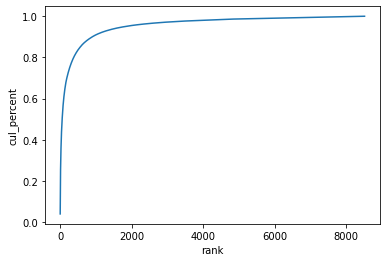

In [30]:
import seaborn as sns

sns.lineplot(x='rank', y='cul_percent', data=wc)

In [31]:
!pip install squarify

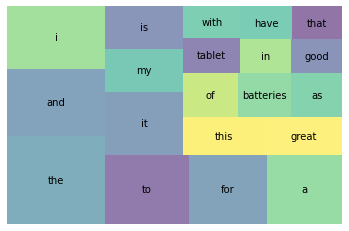

In [32]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]
squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

In [33]:
#spacy 사용하기

import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [35]:
#파이프라인 구성

tokens = []

for doc in tokenizer.pipe(df['reviews.text']):
    #pdb.set_trace()
    doc_tokens = [re.sub(r"[^a-z0-9]", "", token.text.lower()) for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens
df['tokens'].head()

0    [though, i, have, got, it, for, cheap, price, ...
1    [i, purchased, the, 7, for, my, son, when, he,...
2    [great, price, and, great, batteries, i, will,...
3    [great, tablet, for, kids, my, boys, love, the...
4    [they, lasted, really, little, some, of, them,...
Name: tokens, dtype: object

In [36]:
wc = word_count(df['tokens'])
wc.head()

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
64,the,4909,10514,1,0.039229,0.039229,0.468282
11,and,5064,8137,2,0.030360,0.069589,0.483068
12,i,3781,7465,3,0.027853,0.097442,0.360679
132,to,4157,7150,4,0.026678,0.124120,0.396547
31,for,4477,6617,5,0.024689,0.148809,0.427072


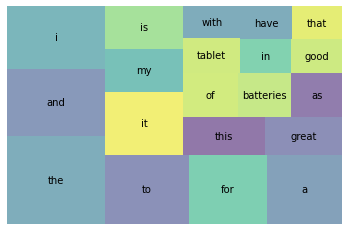

In [37]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()